In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 44.1 MB/s 
     |████████████████████████████████| 6.3 MB 43.2 MB/s 


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

In [4]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving final Data.csv to final Data.csv


In [5]:
df = pd.read_csv('final Data.csv')

In [6]:
df.head(10)

,Sub Div Code,Dtr No,DTR Name,Feeder No,Capacity,Latitude,Longitude
0,133,18,018-paikan,5,100 kVA,24.982307,92.521000
1,133,44,044-KHELMA,2,63 kVA,24.953685,92.499068
2,133,46,046-CRAIGPARK,5,63 kVA,25.008613,92.525782
3,133,50,050-9BPL II,2,25 kVA,24.999775,92.443352
4,133,54,054-BPR 1,9,63 kVA,24.907980,92.673555
5,133,55,055-BPR1,9,63 kVA,24.928374,92.652353
6,133,57,057-CHANDPUR III,9,100 kVA,24.905636,92.675128
7,133,1003,Chandpur-I (Nokyary) (Near PHE),7,25 kVA,24.888106,92.651736
8,133,1005,Chandpur-I ( Near Masjid),7,25 kVA,24.886636,92.656414
9,133,1009,1009- Dudhpur Lamargram (Dindayal),7,25 kVA,24.880567,92.656160


In [8]:
df.shape

(321, 7)

In [9]:
df['Dtr No'].nunique()

321

In [11]:
df['Feeder No'].nunique()

9

In [12]:
df['Feeder No'].unique()

array([  5,   2,   9,   7,   6,   8,   1, 201,   3])

In [13]:
df.drop_duplicates(inplace= True)

In [14]:
df.shape

(321, 7)

In [15]:
#no. of missing data for each column
df.isnull().sum()

Sub Div Code    0
Dtr No          0
DTR Name        0
Feeder No       0
Capacity        0
Latitude        0
Longitude       0
dtype: int64

In [16]:
df.dtypes

Sub Div Code      int64
Dtr No            int64
DTR Name         object
Feeder No         int64
Capacity         object
Latitude        float64
Longitude       float64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 320
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sub Div Code  321 non-null    int64  
 1   Dtr No        321 non-null    int64  
 2   DTR Name      321 non-null    object 
 3   Feeder No     321 non-null    int64  
 4   Capacity      321 non-null    object 
 5   Latitude      321 non-null    float64
 6   Longitude     321 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 20.1+ KB


In [18]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Sub Div Code    133.000000
Dtr No          852.246106
Feeder No         8.831776
Latitude         24.942419
Longitude        92.560238
dtype: float64

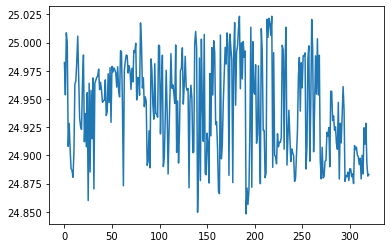

In [19]:
df["Latitude"].plot()

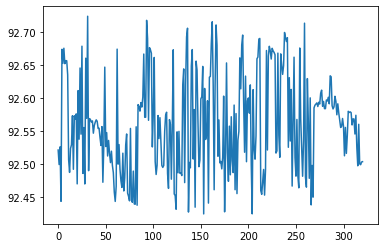

In [20]:
df["Longitude"].plot()

In [21]:
new_dtr=df.dropna()

In [22]:
new_dtr.head()

,Sub Div Code,Dtr No,DTR Name,Feeder No,Capacity,Latitude,Longitude
0,133,18,018-paikan,5,100 kVA,24.982307,92.521000
1,133,44,044-KHELMA,2,63 kVA,24.953685,92.499068
2,133,46,046-CRAIGPARK,5,63 kVA,25.008613,92.525782
3,133,50,050-9BPL II,2,25 kVA,24.999775,92.443352
4,133,54,054-BPR 1,9,63 kVA,24.907980,92.673555


In [23]:
new_dtr.isnull().sum()

Sub Div Code    0
Dtr No          0
DTR Name        0
Feeder No       0
Capacity        0
Latitude        0
Longitude       0
dtype: int64

In [24]:
new_dtr.shape

(321, 7)

In [26]:
dtr_list = new_dtr[['Dtr No', 'DTR Name', 'Latitude', 'Longitude']].values.tolist()

In [27]:
dtr_list

[[18, '018-paikan', 24.9823071, 92.5210001],
 [44, '044-KHELMA', 24.9536851, 92.4990678],
 [46, '046-CRAIGPARK', 25.008613, 92.5257821],
 [50, '050-9BPL II', 24.999775, 92.4433517],
 [54, '054-BPR 1', 24.9079803, 92.6735551],
 [55, '055-BPR1', 24.9283744, 92.6523529],
 [57, '057-CHANDPUR III', 24.9056361, 92.6751281],
 [1003, 'Chandpur-I (Nokyary) (Near PHE)', 24.8881058, 92.6517365],
 [1005, 'Chandpur-I ( Near Masjid)', 24.8866357, 92.656414],
 [1009, '1009- Dudhpur Lamargram (Dindayal)', 24.8805672, 92.6561599],
 [1010, '1010-Lakhipur-III (Dindayal) DT-1', 24.9022079, 92.6348132],
 [1014, '1014-Khelma III (Dindayal)', 24.9632297, 92.5064162],
 [1015, '1015-Sarajpur (Daspara) (Dindayal)', 24.9656625, 92.4871535],
 [1016, '1016-Paikan (Ujangram) (Dindayal)', 24.983425, 92.5234193],
 [1017,
  '1017- Craigpark Mikir Punjee (Shivtilla) (Dindayal)',
  25.0056752,
  92.5290112],
 [102, 'Kalain Bazar (Near FRU)', 24.9678249, 92.5729239],
 [1025, '1025-Saidpur II (Kalibari) (Dindayal)', 24.93

In [30]:
dtr_map = folium.Map(location=[24.9691765, 92.5667413])
fg=folium.FeatureGroup(name='DTR')

for i in dtr_list:
  fg.add_child(folium.Marker(location=[i[2], i[3]], popup=i[1], icon=folium.Icon(color='green')))
dtr_map.add_child(fg)
